In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import backend
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.layers.normalization import BatchNormalization

<h4>Plot Graph for loss

In [0]:
def plot_loss(epoch, valloss, trainloss):
    plt.figure(figsize = (6,6))
    plt.plot(epoch, valloss, 'r', label='Validation Loss')
    plt.plot(epoch, trainloss, 'b', label='Train Loss')
    plt.xlabel('Epochs') 
    plt.ylabel('Categorical Crossentropy Loss')
    plt.title('\nCategorical Crossentropy Loss VS Epochs')
    plt.grid()
    plt.legend()
    plt.show();

<h4> Load MNIST Data

In [7]:
# input image dimensions
img_rows, img_cols = 28, 28

num_classes =10
batch_size =64
epochs = 30

(x_train, y_train), (x_test, y_test) = mnist.load_data()

if(backend.image_data_format() == 'channels_first'):
    # Theano
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    # TensorFlow
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print("x_train shape", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], 'test samples')
    
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

x_train shape (60000, 28, 28, 1)
60000 train samples
10000 test samples


<h2>Model with 2 Convolution Layer</h2>

In [8]:
# Initializing the model
model = Sequential()

# Adding First Conv Layer
model.add(Conv2D(6, kernel_size=(3,3), activation='relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))

# Adding Second Conv Layer
model.add(Conv2D(16, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(optimizer = keras.optimizers.Adam(),
             loss = keras.losses.categorical_crossentropy,
             metrics = ['accuracy'])

history_2 = model.fit(x_train, y_train, batch_size=batch_size, epochs =epochs, verbose=1, validation_data = (x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 6)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 16)          2416      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
__________

Test loss 0.024233725599301398
Test accuracy 0.9919


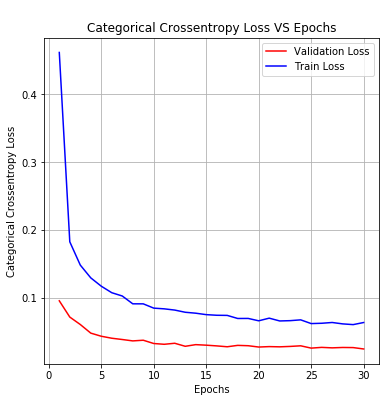

In [9]:
# Evaluating the model
score = model.evaluate(x_test, y_test, verbose=0)

print("Test loss", score[0])
print("Test accuracy", score[1])

# Test and train accuracy of the model
model2_train = max(history_2.history['acc'])
model2_test =score[1]

# list of epoch numbers
epoch = list(range(1, epochs+1))

# Validation loss
valLoss = history_2.history['val_loss']
# Training loss
trainLoss = history_2.history['loss']

# Error plot
plot_loss(epoch, valLoss, trainLoss)

<h3>Model with 4 Convolution Layer

In [10]:
# Initializing the model
model = Sequential()

# Adding First Conv Layer
model.add(Conv2D(12, kernel_size=(3,3), activation='relu', input_shape = input_shape))
# Adding Second Conv Layer
model.add(Conv2D(24, kernel_size=(5,5), activation='relu'))
# Adding MaxPool Layer
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))

# Adding Third Conv Layer
model.add(Conv2D(36, kernel_size=(3,3), activation='relu'))
# Adding Fourth Conv Layer
model.add(Conv2D(36, kernel_size=(3,3), activation='relu'))
# Adding MaxPool Layer
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.4))

# Adding Flatten Layer
model.add(Flatten())
# Adding First Hidden Layer
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Adding Output Layer
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(optimizer = keras.optimizers.Adam(),
             loss = keras.losses.categorical_crossentropy,
             metrics = ['accuracy'])

history_4 = model.fit(x_train, y_train, batch_size=batch_size, epochs =epochs, verbose=1, validation_data = (x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 12)        120       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 24)        7224      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 24)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 11, 11, 24)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 36)          7812      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 36)          11700     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 36)          0         
__________

Test loss 0.01670674963645597
Test accuracy 0.9951


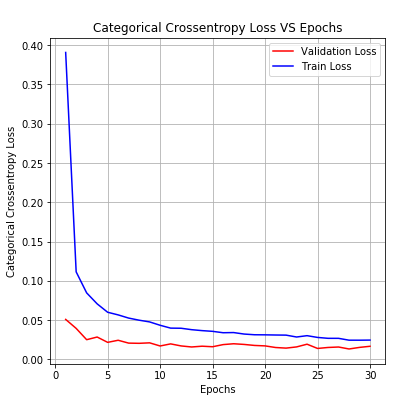

In [11]:
# Evaluating the model
score = model.evaluate(x_test, y_test, verbose=0)

print("Test loss", score[0])
print("Test accuracy", score[1])

# Test and train accuracy of the model
model4_train = max(history_4.history['acc'])
model4_test =score[1]

# list of epoch numbers
epoch = list(range(1, epochs+1))

# Validation loss
valLoss = history_4.history['val_loss']
# Training loss
trainLoss = history_4.history['loss']

# Error plot
plot_loss(epoch, valLoss, trainLoss)

<h4> Model with 6 Convolution Layer

In [12]:
# Initializing the model
model = Sequential()

# Adding First Conv Layer
model.add(Conv2D(8, kernel_size=(2,2), activation='relu', input_shape = input_shape))
# Adding Second Conv Layer
model.add(Conv2D(16, kernel_size=(2,2), activation='relu'))
# Adding MaxPool Layer
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))

# Adding Third Conv Layer
model.add(Conv2D(24, kernel_size=(3,3), activation='relu'))
# Adding MaxPool Layer
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

# Adding Fourth Conv Layer
model.add(Conv2D(24, kernel_size=(3,3), activation='relu'))
# Adding Fifth Conv Layer
model.add(Conv2D(36, kernel_size=(3,3), activation='relu'))
# Adding Sixth Conv Layer
model.add(Conv2D(36, kernel_size=(2,2), activation='relu'))
# Adding MaxPool Layer
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.2))

# Adding Flatten Layer
model.add(Flatten())
# Adding First Hidden Layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Adding Output Layer
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(optimizer = keras.optimizers.Adam(),
             loss = keras.losses.categorical_crossentropy,
             metrics = ['accuracy'])

history_6 = model.fit(x_train, y_train, batch_size=batch_size, epochs =epochs, verbose=1, validation_data = (x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 27, 27, 8)         40        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 26, 16)        528       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 24)        3480      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 24)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 24)          5208      
__________

Test loss 0.0326356014643894
Test accuracy 0.9925


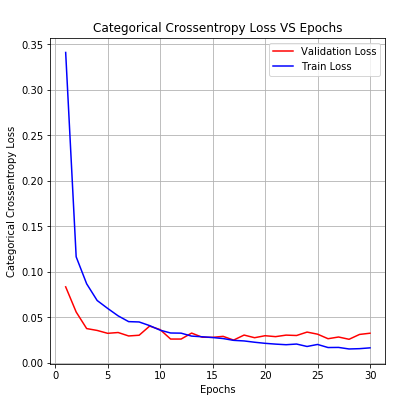

In [13]:
# Evaluating the model
score = model.evaluate(x_test, y_test, verbose=0)

print("Test loss", score[0])
print("Test accuracy", score[1])

# Test and train accuracy of the model
model6_train = max(history_6.history['acc'])
model6_test =score[1]

# list of epoch numbers
epoch = list(range(1, epochs+1))

# Validation loss
valLoss = history_6.history['val_loss']
# Training loss
trainLoss = history_6.history['loss']

# Error plot
plot_loss(epoch, valLoss, trainLoss)

<h3>CONCLUSION</h3>

**(a). Procedure Followed :**

1.   Loaded MNIST dataset from Keras
2.   Split the dataset into train and test
3.   Normalize the train and test data
4.   Convert class label into categorical data vector
5.   Implement Softmax classifier with 2 , 4 and 6 convolution layers
6.   Use kernel of different size (2,2), (3X3) and (5X5) 
7.   Added Dropout and Batch Normalization to the hidden layers
8.   Plotted Categorical Crossentropy Loss VS No.of Epochs


**(b) Table (Different models with their train and test accuracies):**

In [14]:
# Creating table using PrettyTable
from prettytable import PrettyTable

# Names of models
names = ['CNN(2-Conv layers)','CNN(4-Conv layers) ', 'CNN(6-Conv layers)']

# Training accuracy
train_accuracy = [model2_train, model4_train, model6_train]

# Test accuracy
test_accuracy = [model2_test, model4_test, model6_test]

numbering = [1,2,3]

# Initializing prettytable
ptable = PrettyTable()

# Adding columns
ptable.add_column("S.NO.",numbering)
ptable.add_column("MODEL",names)
ptable.add_column("Training Accuracy",train_accuracy)
ptable.add_column("Test Accuracy",test_accuracy)

# Printing the Table
print(ptable)

+-------+---------------------+--------------------+---------------+
| S.NO. |        MODEL        | Training Accuracy  | Test Accuracy |
+-------+---------------------+--------------------+---------------+
|   1   |  CNN(2-Conv layers) |       0.982        |     0.9919    |
|   2   | CNN(4-Conv layers)  |      0.99275       |     0.9951    |
|   3   |  CNN(6-Conv layers) | 0.9955333333333334 |     0.9925    |
+-------+---------------------+--------------------+---------------+
